<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Wellenausbreitung im Dehnstab, Rand- und Übergangsbedingungen mit disreten Kraftelementen


Module laden

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave1d_discrete_elements_interaction.ipynb
printing.init_printing(use_latex='mathjax')

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Randbedingungen

![wavebar_bc.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_bc.png)

Variablen für symbolische Rechnung deklarieren (sympy)

In [4]:
m, c, k, w, EA, kappa, z, omega, t, C1, C2, R1, R2, SIN, COS = sp.symbols('m c k w EA kappa z omega t C1 C2 R1 R2 SIN COS')

Randbedingung in zwei Gleichungen aufteilen (reelle Zahlen: sin-/cos-Terme)

In [5]:
def reflection(BC):
    BCz0 =  BC.subs(z, 0)   # evaluate BC at z=0
    BCsincos = BCz0.subs([ (sp.sin(omega*t), SIN), (sp.cos(omega*t), COS)] )   # turn functions into constants to enable collect
    BCSC = sp.collect( sp.expand(BCsincos), [SIN, COS])   # first expand and then collect for sin- and cos-terms
    BCsin = BCSC.coeff(SIN)
    BCcos = BCSC.coeff(COS)
    solution = sp.solve( [BCcos, BCsin], R1, R2)    # use sp.linsolve if speed becomes an issue
    return solution

Überlagerung einfallender und reflektierter Welle, benötigte Ableitungen

In [6]:
w   = C1*sp.cos(kappa*z + omega*t) + C2*sp.sin(kappa*z + omega*t) + R1*sp.cos(kappa*z - omega*t) + R2*sp.sin(kappa*z - omega*t)
wt  = sp.diff(w,  t)
wtt = sp.diff(wt, t)
wz  = sp.diff(w,  z)

Zahlenwerte für die spätere Auswertung

In [7]:
EA_n = 10   # distributed stiffness (bar)
cn = 10       # wave speed
C1_n = 1.0   # incident wave (cos)
C2_n = 0.0   # incident wave (sin)

**Randfeder**

In [8]:
springBC = k*w - EA*wz
springBCsol = reflection(springBC) ##:

Auswerten der Lösungen für konkrete Zahlenwerte

In [9]:
r1k = sp.lambdify((kappa, C1, C2, EA, k), springBCsol[R1], modules='numpy')
r2k = sp.lambdify((kappa, C1, C2, EA, k), springBCsol[R2], modules='numpy')

In [10]:
k1_n = 0.010  # small value of concentrated stiffness (spring)
k2_n = 1.000  # medium value of concentrated stiffness (spring)
k3_n = 100.0  # large value of concentrated stiffness (spring)

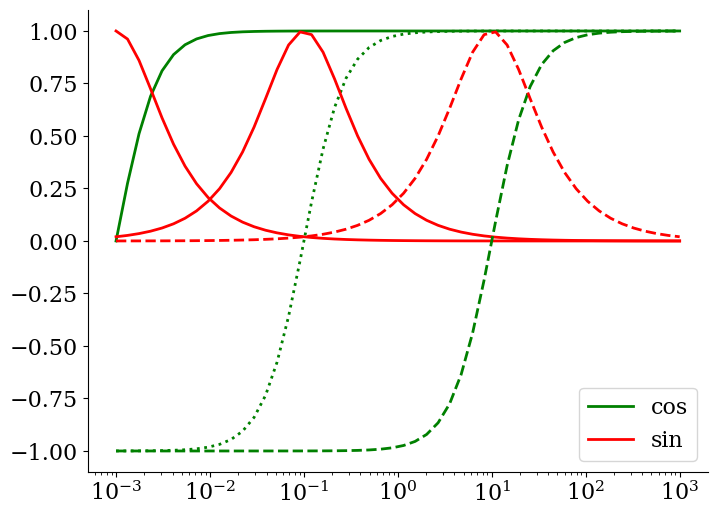

In [11]:
kappa_grid = np.logspace(-3, 3)
r1_k1 = np.array([r1k(kappa_n, C1_n, C2_n, EA_n, k1_n) for kappa_n in kappa_grid])
r1_k2 = np.array([r1k(kappa_n, C1_n, C2_n, EA_n, k2_n) for kappa_n in kappa_grid])
r1_k3 = np.array([r1k(kappa_n, C1_n, C2_n, EA_n, k3_n) for kappa_n in kappa_grid])
r2_k1 = np.array([r2k(kappa_n, C1_n, C2_n, EA_n, k1_n) for kappa_n in kappa_grid])
r2_k2 = np.array([r2k(kappa_n, C1_n, C2_n, EA_n, k2_n) for kappa_n in kappa_grid])
r2_k3 = np.array([r2k(kappa_n, C1_n, C2_n, EA_n, k3_n) for kappa_n in kappa_grid])

plt.semilogx(kappa_grid, r1_k1, 'g-' , kappa_grid, r2_k1, 'r-');
plt.legend(['cos', 'sin']);
plt.semilogx(kappa_grid, r1_k2, 'g:' , kappa_grid, r2_k2, 'r-');
plt.semilogx(kappa_grid, r1_k3, 'g--', kappa_grid, r2_k3, 'r--');
plt.show()

**Randdämpfer**

In [12]:
dashpotBC = c*wt - EA*wz
dashpotBCsol = reflection(dashpotBC) ##:

Auswerten der Lösungen für konkrete Zahlenwerte

In [13]:
r1c = sp.lambdify((kappa, C1, C2, EA, c, omega), dashpotBCsol[R1], modules='numpy')
r2c = sp.lambdify((kappa, C1, C2, EA, c, omega), dashpotBCsol[R2], modules='numpy')

In [14]:
c1_n = 0.01  # small value of damper 
c2_n = 0.9  # medium value of damper 
c3_n = 1.1  # large value of damper 

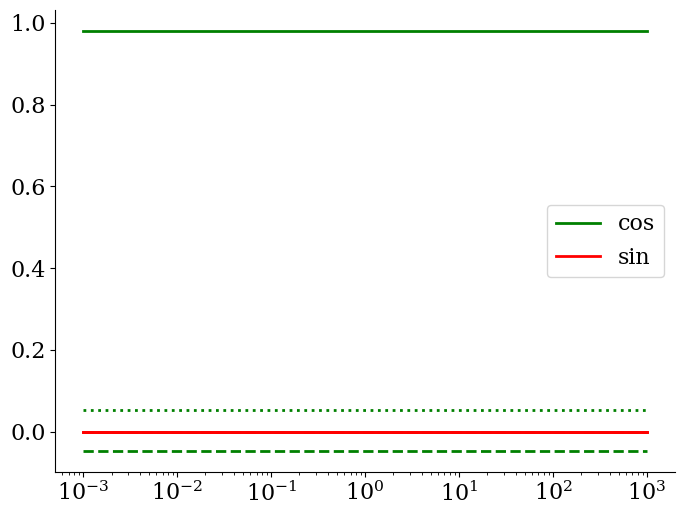

In [15]:
r1_c1 = np.array([r1c(kappa_n, C1_n, C2_n, EA_n, c1_n, cn*kappa_n) for kappa_n in kappa_grid])
r1_c2 = np.array([r1c(kappa_n, C1_n, C2_n, EA_n, c2_n, cn*kappa_n) for kappa_n in kappa_grid])
r1_c3 = np.array([r1c(kappa_n, C1_n, C2_n, EA_n, c3_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_c1 = np.array([r2c(kappa_n, C1_n, C2_n, EA_n, c1_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_c2 = np.array([r2c(kappa_n, C1_n, C2_n, EA_n, c2_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_c3 = np.array([r2c(kappa_n, C1_n, C2_n, EA_n, c3_n, cn*kappa_n) for kappa_n in kappa_grid])

plt.semilogx(kappa_grid, r1_c1, 'g-' , kappa_grid, r2_c1, 'r-');
plt.legend(['cos', 'sin']);
plt.semilogx(kappa_grid, r1_c2, 'g:' , kappa_grid, r2_c2, 'r-');
plt.semilogx(kappa_grid, r1_c3, 'g--', kappa_grid, r2_c3, 'r--');
plt.show()

**Randmasse**

In [16]:
massBC = m*wtt - EA*wz
massBCsol = reflection(massBC) ##:

In [17]:
r1m = sp.lambdify((kappa, C1, C2, EA, m, omega), massBCsol[R1], modules='numpy')
r2m = sp.lambdify((kappa, C1, C2, EA, m, omega), massBCsol[R2], modules='numpy')

In [18]:
m1_n = 0.10  # small value of end mass
m2_n = 1.00  # medium value of end mass
m3_n = 10.0  # large value of end mass

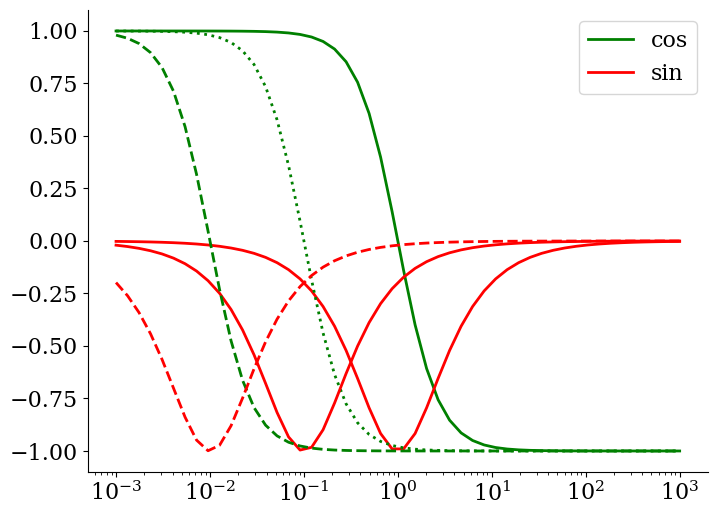

In [19]:
r1_m1 = np.array([r1m(kappa_n, C1_n, C2_n, EA_n, m1_n, cn*kappa_n) for kappa_n in kappa_grid])
r1_m2 = np.array([r1m(kappa_n, C1_n, C2_n, EA_n, m2_n, cn*kappa_n) for kappa_n in kappa_grid])
r1_m3 = np.array([r1m(kappa_n, C1_n, C2_n, EA_n, m3_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_m1 = np.array([r2m(kappa_n, C1_n, C2_n, EA_n, m1_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_m2 = np.array([r2m(kappa_n, C1_n, C2_n, EA_n, m2_n, cn*kappa_n) for kappa_n in kappa_grid])
r2_m3 = np.array([r2m(kappa_n, C1_n, C2_n, EA_n, m3_n, cn*kappa_n) for kappa_n in kappa_grid])

plt.semilogx(kappa_grid, r1_m1, 'g-' , kappa_grid, r2_m1, 'r-');
plt.legend(['cos', 'sin']);
plt.semilogx(kappa_grid, r1_m2, 'g:' , kappa_grid, r2_m2, 'r-');
plt.semilogx(kappa_grid, r1_m3, 'g--', kappa_grid, r2_m3, 'r--');
plt.show()

Wie ließe sich die Rechnung für Kombinationen mehrerer Kraftelemente zusammenfassen?

Wie ließe sich die Rechnung durch komplexe Zahlen kompakter formulieren?

## Übergangsbedingungen

![wavebar_tc.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_tc.png)

In [20]:
interactive_transition_conditions_plot()   

interactive(children=(IntSlider(value=0, description=r'$m/m_\mathrm{ref}$:', max=500, step=10), IntSlider(valu…

Durch welche konstruktiven Maßnahmen ließe sich eine gute Schwingungsisolation erreichen?

### Herleitung der Ausdrücke hinter dem interaktiven Diagramm

In [21]:
m, c, k, w, EA, kappa, z, omega, t = sp.symbols('m c k w EA kappa z omega t', real=True)  # dimensional parameters
C, cT, cR = sp.symbols('C cT cR')   # incident amplitude, transmission and reflection coefficient
   
w_left = cR*C*sp.exp(sp.I*(-kappa*z - omega*t)) + C*sp.exp(sp.I*(+kappa*z - omega*t))    # waves in left domain (incident and reflected)
w_left_z =  sp.diff(w_left, z)   # spatial derivative
w_left_t =  sp.diff(w_left, t)   # temporal derivative (velocity)
w_left_tt = sp.diff(w_left_t, t)   # temporal derivative (acceleration)

w_right  = cT*C*sp.exp(sp.I*(+kappa*z - omega*t))    # wave in right domain (transmitted)
w_right_z =  sp.diff(w_right, z)   # spatial derivative
w_right_t =  sp.diff(w_right, t)   # temporal derivative (velocity)
w_right_tt = sp.diff(w_right_t, t)   # temporal derivative (acceleration)

kinematics = w_left - w_right   # continuity in displacement
kinematics_z0 = kinematics.subs(z, 0)   # evaluate TC at z=0
kinematics_eq = sp.simplify(kinematics_z0*sp.exp(sp.I*omega*t))   # cancel time-depependency

#kinetics = EA*(w_right_z-w_left_z) - k*w_right - c*w_right_t - m*w_right_tt   # momentum balance
kinetics = EA*(w_right_z-w_left_z) - k*w_left - c*w_left_t - m*w_left_tt   # momentum balance
kinetics_z0 =  kinetics.subs(z, 0)   # evaluate TC at z=0
kinetics_eq = sp.simplify(kinetics_z0*sp.exp(sp.I*omega*t))   # cancel time-depependency

TCsol = sp.solve([kinematics_eq, kinetics_eq], cR, cT)   # solve transition conditions
cT = TCsol[cT]   # transmission coefficient
cR = TCsol[cR]   # reflection coefficient

print("cT = {}".format(cT))
display(cT)
print("cR = {}".format(cR))
display(cR)

cT = 2*EA*kappa/(2*EA*kappa + c*omega + I*k - I*m*omega**2)


           2⋅EA⋅κ          
───────────────────────────
                          2
2⋅EA⋅κ + c⋅ω + ⅈ⋅k - ⅈ⋅m⋅ω 

cR = (-c*omega - I*k + I*m*omega**2)/(2*EA*kappa + c*omega + I*k - I*m*omega**2)


                      2    
    -c⋅ω - ⅈ⋅k + ⅈ⋅m⋅ω     
───────────────────────────
                          2
2⋅EA⋅κ + c⋅ω + ⅈ⋅k - ⅈ⋅m⋅ω 